# **PREAnoTeTool - ETAPA 4: GERAR GRAFO DE JSONL PARA RDF TURTLE .TTL**

## Este caderno é resposável por gerar os dados de JSONL para grafo RDF Turtle (.ttl) e realizar consultas por meio da linguagem SPARQL

### Passo a passo
#### 1 - "Setar" o caminho /content/drive/MyDrive/preanotetool/
#### 2 - Copiar a fatia do corpus anotado manualmente na pasta .../tests/corpus_anotado_manualmente.jsonl.
#### 3 - Copiar a fatia do corpus pré-anotado pela rotina na pasta .../tests/corpus_pré-anotado.jsonl.

### Data de Criação: 01-04-2024
### Última atualização: 20-04-2023
### Autores: Gustavo Danon e Jones.

In [8]:
#Inserção Jones para acessar a pasta do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!pip3 install PyPDF2
!pip3 install rdflib pydotplus graphviz kglab

In [10]:
import re
import sys
import json

import os

sys.path.insert(0,'/content/drive/MyDrive/preanotetool/')
os.chdir('/content/drive/MyDrive/preanotetool/')

import rdflib

from C2IME import *

In [11]:
# Célula que gera RDF Turtle .TTL a partir de um arquivo .JSONL
# Variável anotated_filename = "arquivo.jsonl"
# Variável saida_ttl = "grafo_saida.ttl"

anotated_filename ='texts/corpus_curado.jsonl'
saida_ttl = 'docs/grafo_corpus_curado.ttl'

g=graph_functions.run_anotated_file(anotated_filename)
graph_functions.salvar_graph_ttl(g, saida_ttl)

[{'id': 6, 'text': 'AÇÃO – Ato ou efeito de realizar uma tarefa ou conjunto de tarefas que contribuem para a realização de uma determinada operação. ', 'Comments': [], 'entities': [{'id': 1409027, 'label': 'entity', 'start_offset': 0, 'end_offset': 5}, {'id': 1409028, 'label': 'entity', 'start_offset': 7, 'end_offset': 10}, {'id': 1409029, 'label': 'entity', 'start_offset': 14, 'end_offset': 20}, {'id': 1409030, 'label': 'entity', 'start_offset': 37, 'end_offset': 43}, {'id': 1409032, 'label': 'entity', 'start_offset': 119, 'end_offset': 127}], 'relations': [{'id': 279041, 'from_id': 1409028, 'to_id': 1409029, 'type': 'type_of'}, {'id': 279042, 'from_id': 1409027, 'to_id': 1409030, 'type': 'applied_to'}, {'id': 279043, 'from_id': 1409027, 'to_id': 1409032, 'type': 'applied_to'}, {'id': 293272, 'from_id': 1409027, 'to_id': 1409028, 'type': 'type_of'}, {'id': 293624, 'from_id': 1409032, 'to_id': 1409030, 'type': 'composed_of'}]}, {'id': 7, 'text': 'AÇÃO AÉREA – Ação tática na qual o esfo

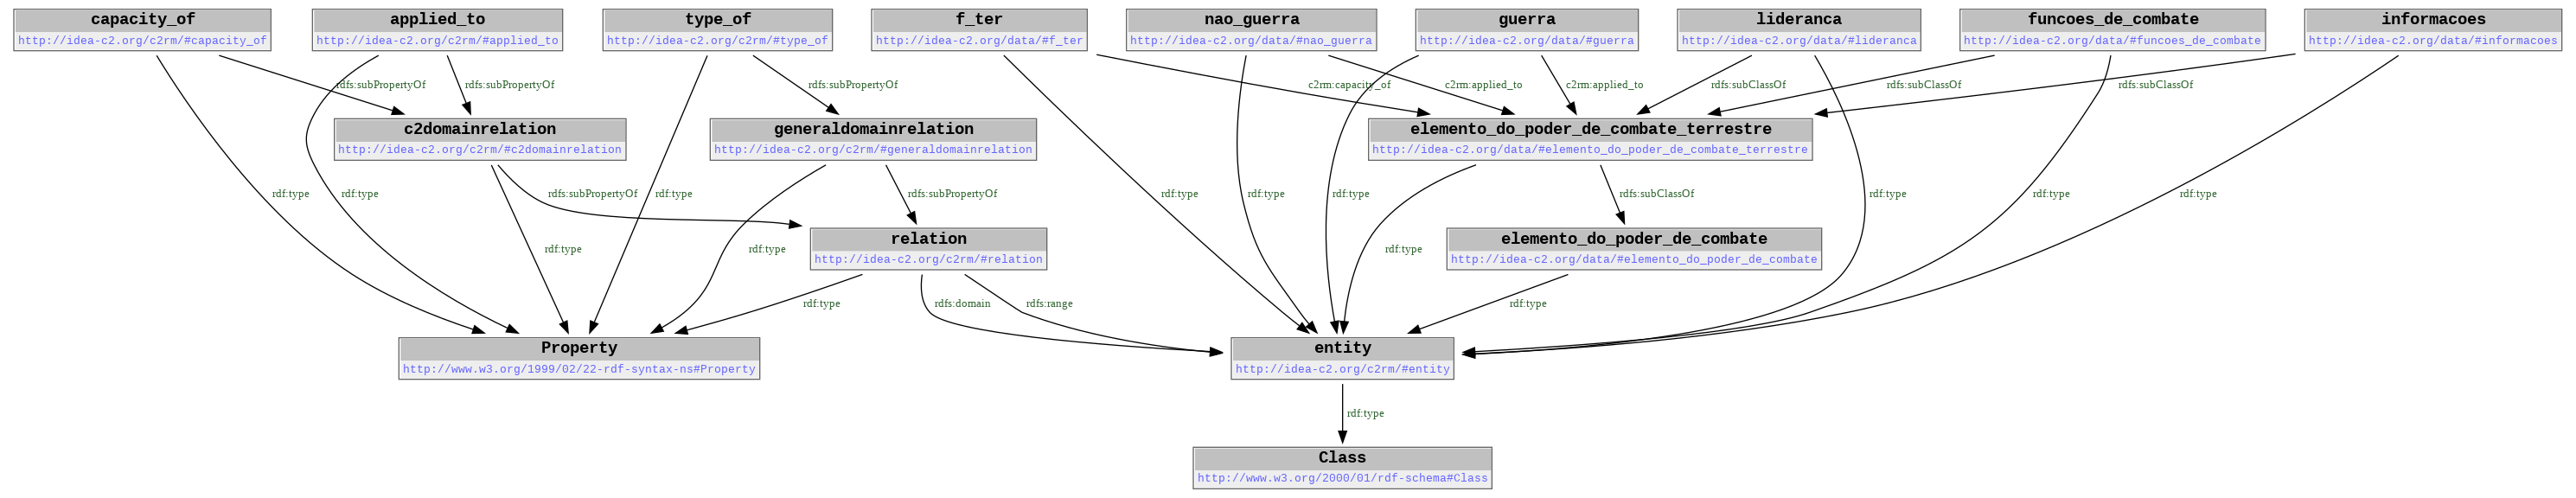

In [12]:
# Visualização de um arquivo .TTL
# Para efeitos de performance, foi utilizado o arquivo .TTL do grafo apresentado no artigo
rdf_turtle='docs/grafo_artigo.ttl'
h=graph_functions.load_turtle_to_graph(rdf_turtle)
graph_functions.visualize_graph_rdf_turtle(h)

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>  PREFIX c2rm: <http://idea-c2.org/c2rm/#>  PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> PREFIX cnt: <http://idea-c2.org/data/#> SELECT  ?s ?p ?o WHERE  {     {?s ?p ?o . FILTER(?s=cnt:operacao_conjunta)     } }
http://idea-c2.org/data/#operacao_conjunta http://www.w3.org/2000/01/rdf-schema#seeAlso http://idea-c2.org/data/#centro_de_operacoes_conjuntas
http://idea-c2.org/data/#operacao_conjunta http://www.w3.org/2000/01/rdf-schema#seeAlso http://idea-c2.org/data/#representantes
http://idea-c2.org/data/#operacao_conjunta http://www.w3.org/2000/01/rdf-schema#comment http://idea-c2.org/data/#heterogeneidade_dos_processos_de_emprego
http://idea-c2.org/data/#operacao_conjunta http://www.w3.org/2000/01/rdf-schema#seeAlso http://idea-c2.org/data/#ferramentas
http://idea-c2.org/data/#operacao_conjunta http://idea-c2.org/c2rm/#applied_to http://idea-c2.org/data/#comando_e_controle
http://idea-c2.org/data/#operacao_conjunta http://

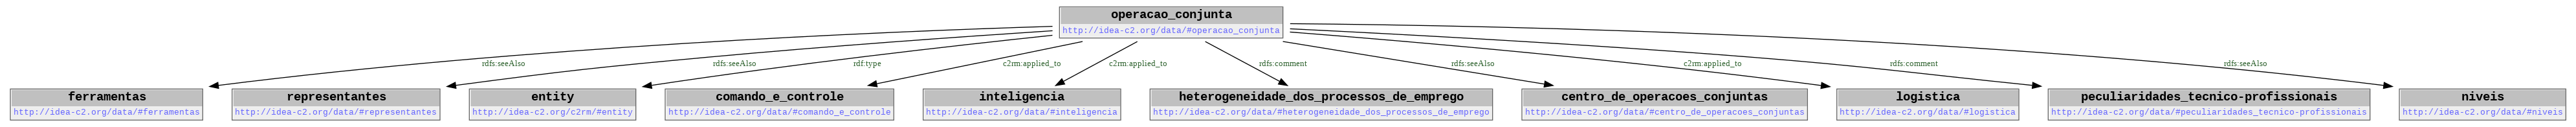

In [20]:
# Para efeitos de testes, foi utilizado grafo completo
# A consulta retorna todos os nós do grafo relacionados ao nó cnt:operacao_conjunta
rdf_turtle='docs/grafo_corpus_curado.ttl'
g=graph_functions.load_turtle_to_graph(rdf_turtle)

query = ''
query = 'PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> '
query = query + ' PREFIX c2rm: <http://idea-c2.org/c2rm/#> '
query = query + ' PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>'
query = query + ' PREFIX cnt: <http://idea-c2.org/data/#>'

query = query + ' SELECT  ?s ?p ?o'
query = query + ' WHERE '
query = query + ' {'
query = query + '     {?s ?p ?o .'
query = query + ' FILTER(?s=cnt:operacao_conjunta)'
query = query + '     }'
query = query + ' }'

xlist=graph_functions.select_grafo2(g, query)
g2=graph_functions.create_subgraph(xlist)
graph_functions.visualize_graph_rdf_turtle(g2)